# Job Madrid Hackaton

<img src="https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/81f1f131049961.563f0d5d52dde.jpg">

## Business Analytics
-------------------------------------

## 🛫 Background

You works at an airline called Nuwe Air and is part of the customer success team. As you know, Nuwe Air always seeks to achieve maximum passenger satisfaction and the mission of your department is to detect defects and areas for improvement and make decisions to increase overall satisfaction.

Your head of department launched an initiative a few months ago to find out the opinion of our passengers after flying with Nuwe Air. Now it's your turn to enter the scene and find out what customers think of the service we offer them and where we have to focus to improve our results.

What is asked of you in this case is to identify which are the services that require the most urgency, which types of clients are the best and which types of clients are the worst, which are the fields that most affect satisfaction total of the client (it can be the delay in leaving, in arriving, the food provided during the flights...), etc., and build a dashboard that helps your head of department to understand this data. In addition, since he is very confident in your skills and knowledge of the sector, he asks you to also give him some recommendation on what areas or what type of client we have to focus on in order to improve the average satisfaction of our clients.


## 📚 Dataset

* Gender: Gender of passengers (female, male)
* Customer Type: The type of customer (Loyal Customer, Disloyal Customer)
* Age: The actual age of the passengers
* Type of trip: Purpose of the passenger's flight (Personal trip, Business trip)
* Class: Class of travel on the passenger plane (Business, Eco, Eco Plus)
* Flight Distance: The flight distance of this trip
* Wi-Fi service on board: Level of satisfaction with the Wi-Fi service on board (0: Not applicable; 1-5)
* Convenient departure/arrival time: Level of satisfaction regarding the convenience of the departure/arrival time
* Ease of online booking: Satisfaction level of online booking
* Door location: Satisfaction level of the door location
* Food and drink: Level of satisfaction with food and drink
* Online boarding: Level of satisfaction with online boarding
* Seat comfort: Satisfaction level of seat comfort
* On-board entertainment: Satisfaction level of in-flight entertainment
* On-board service: Level of satisfaction with the on-board service
* Waiting room service: Service satisfaction level in the waiting room
* Baggage handling: Satisfaction level of the baggage service
* Billing service: Satisfaction level of the billing service
* On-board service: Level of satisfaction with the on-board service
* Cleanliness: Level of satisfaction with cleanliness
* Delay in departure in minutes: Minutes of delay in departure
* Delay in arrival in minutes: Minutes of delay in arrival
* Satisfaction: Level of satisfaction of the airline (Satisfaction, neutral or dissatisfaction)


## ⚡ Challenge 

* What areas do we need to improve to achieve greater customer satisfaction?
* What type of customers do we have to focus on to improve their satisfaction, especially

* Information that the dashboard/presentation may contain:
* * What kind of clients do we have the most?
* * What kind of customers are the most dissatisfied?
* * What is the area where we have the lowest satisfaction?
* * What is the average satisfaction of the areas and in which are we most below?
* * What areas most affect the customer's bottom line being "not satisfied"?
* * Is there any noticeable difference in how some types of clients perceive some services vs how others perceive it?

---------------------------------------------------------

## 1) Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2) Data Cleaning

In [3]:
df = pd.read_csv('cuestionario_satisfaccion.csv')

We will perform a sanity check of our dataset, in order to have a first look of:
* Data types
* Null values
* Size

In [4]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


💡 Data Hint:  as we can see, we have few null values in "Arrival Delay" feature.

Since sounds logical that if the fly departed late, will arrive late too..Can we train a linear model in order to replace values, based on "Departure Delay" features?

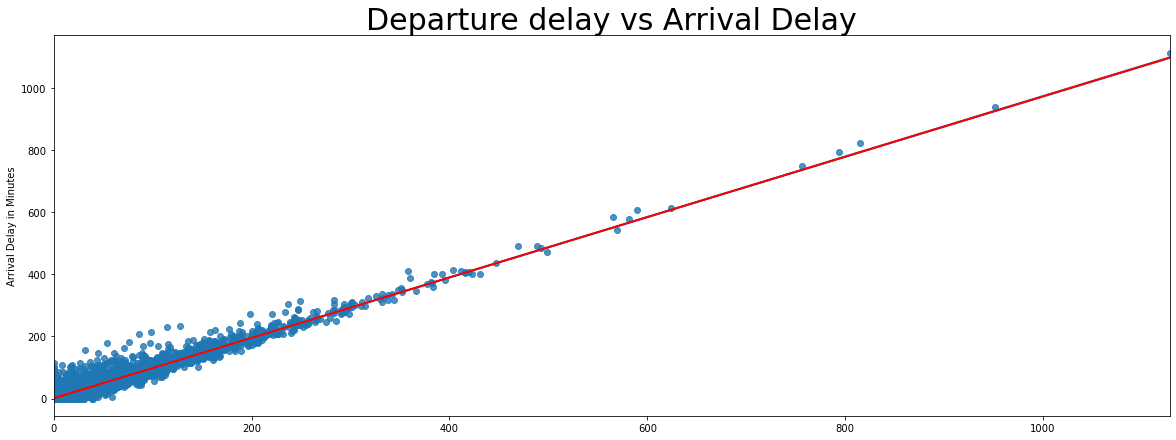

In [5]:
df_wo_na = df.dropna()

plt.figure(figsize=(20,7))
x=df_wo_na["Departure Delay in Minutes"].values.reshape((-1, 1))
y=df_wo_na["Arrival Delay in Minutes"]
# plot
plt.title("Departure delay vs Arrival Delay", size=30)
sns.regplot(x=x, y=y)

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(x, y)
plt.plot(x, lin.predict(x), color = 'red')
plt.show()


In [6]:
r_sq = lin.score(x, y)
print(f"Coefficient of determination: {r_sq}")


Coefficient of determination: 0.9302636670264322


In [7]:
print(f"intercept: {lin.intercept_}")
print(f"slope: {lin.coef_[0]}")

intercept: 0.8983874492242627
slope: 0.9731030700112295


As we can see, we have a good linear pattern between our features, so we will use our linear model in order to replace the missing values for "Arrival Delay"

In [8]:
df['Arrival Delay in Minutes'].fillna( lin.coef_[0] * df['Departure Delay in Minutes'] + lin.intercept_, inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

-----------------------------------------------------

## 3) Main Bussiness Questions

### a) What areas do we need to improve to achieve greater customer satisfaction?

Text(0.5, 1.0, 'Customer Satisfaction and Delay')

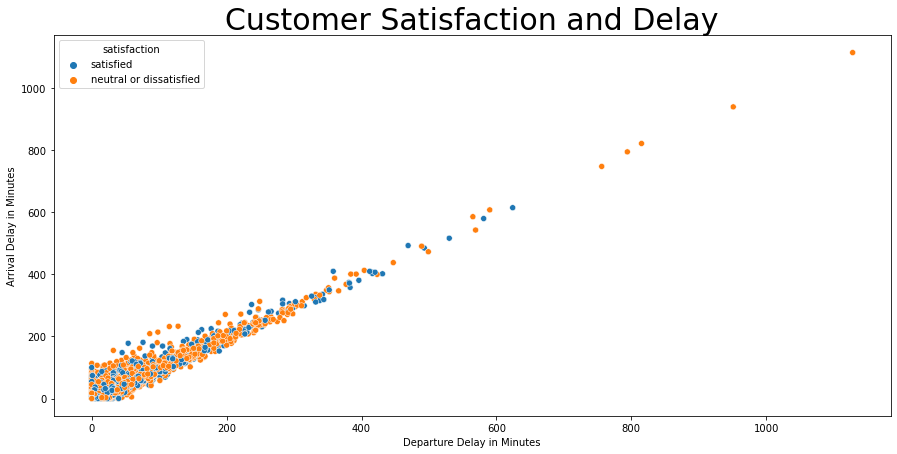

In [11]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes', hue='satisfaction', data=df )
plt.title('Customer Satisfaction and Delay', size=30)

We notice that at higher levels of delay, the clients are likely to be sissatisfied.<br>
But.. What makes customers unsatisfied, on flights that have not taken so long?

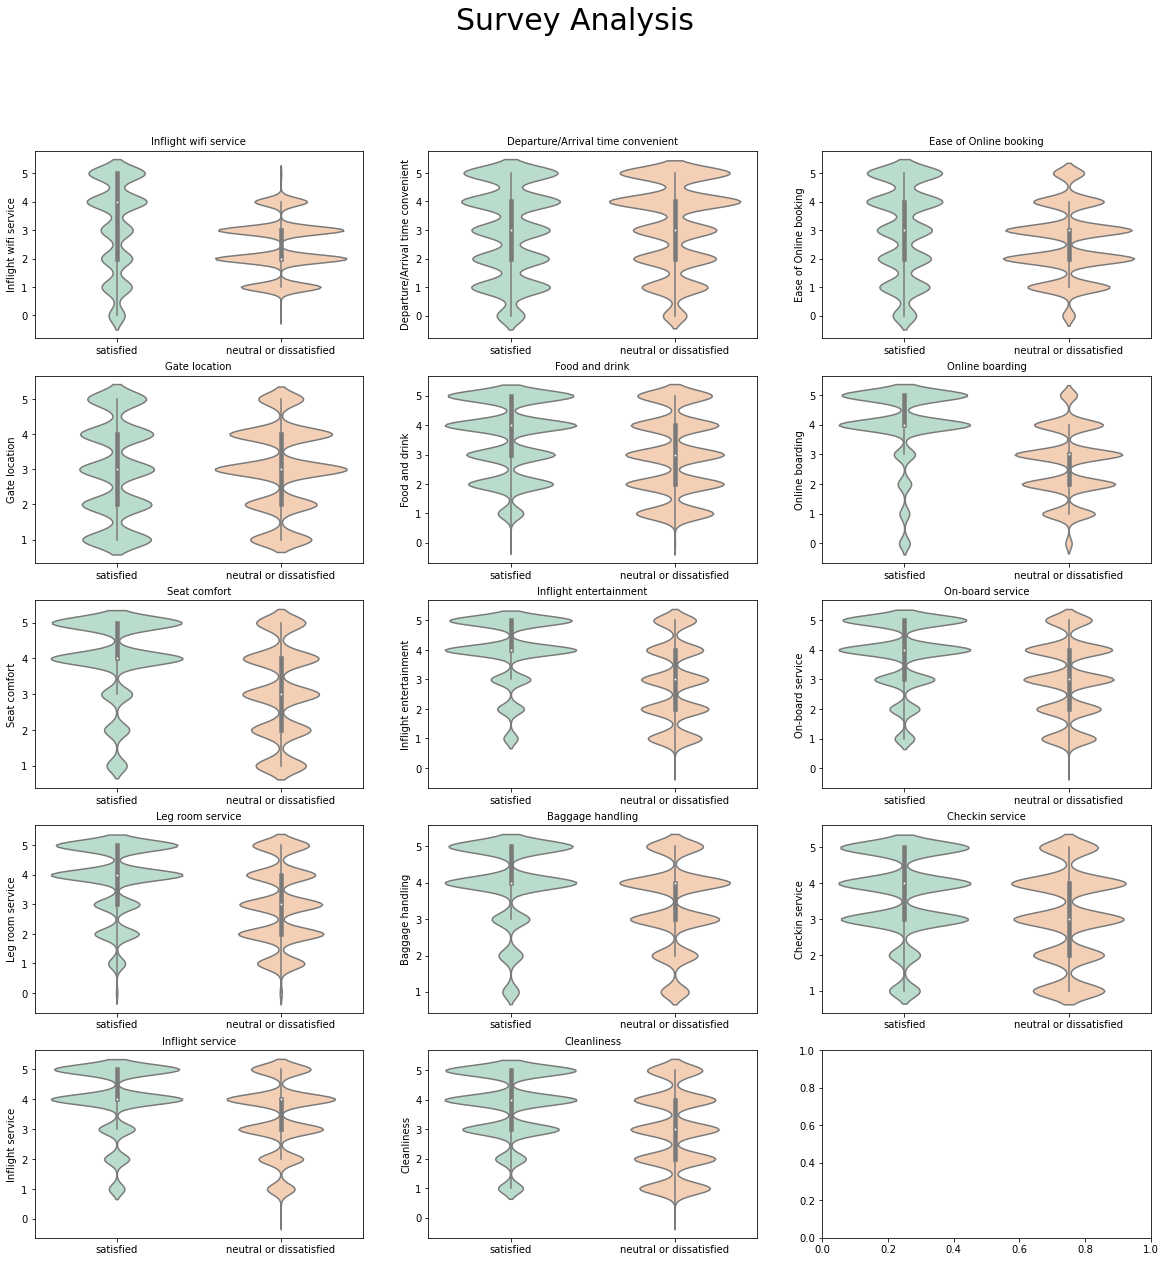

In [12]:
subset = df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']]


fig, axis=plt.subplots(5,3,figsize=(20,20))
column = 0
row = 0
features = list(subset.columns)[:-1]
plt.suptitle('Survey Analysis',fontsize=30)
for col in features:
    axis[row,column].set_title(col, size=10)
    box = sns.violinplot(y = col, data = subset, ax=axis[row, column], palette='Pastel2', x='satisfaction')
    box.set(xlabel=None)
    if column == 2:
        column = 0
        row+=1
    else:
        column+=1


In [13]:
# we create a new column which represents our feature of interst, but in a numerical way
df['satisfaction_bool'] = df.satisfaction.apply(lambda x: 1 if x=='satisfied' else 0)


In [14]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'satisfaction_bool'],
      dtype='object')

In [15]:
col = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
aux = df.copy()
aux['dummy']='mean'
pivot = pd.pivot_table(data = aux,index='dummy',values= col, aggfunc=np.mean )
summary_kpis=pd.DataFrame(pivot.transpose()['mean']).sort_values(by='mean', ascending=True)
summary_kpis

,mean
Inflight wifi service,2.724746
Ease of Online booking,2.756775
Gate location,2.977094
Departure/Arrival time convenient,3.046812
Food and drink,3.215353
Online boarding,3.261665
Cleanliness,3.286226
Checkin service,3.314175
Leg room service,3.350169
Inflight entertainment,3.357753


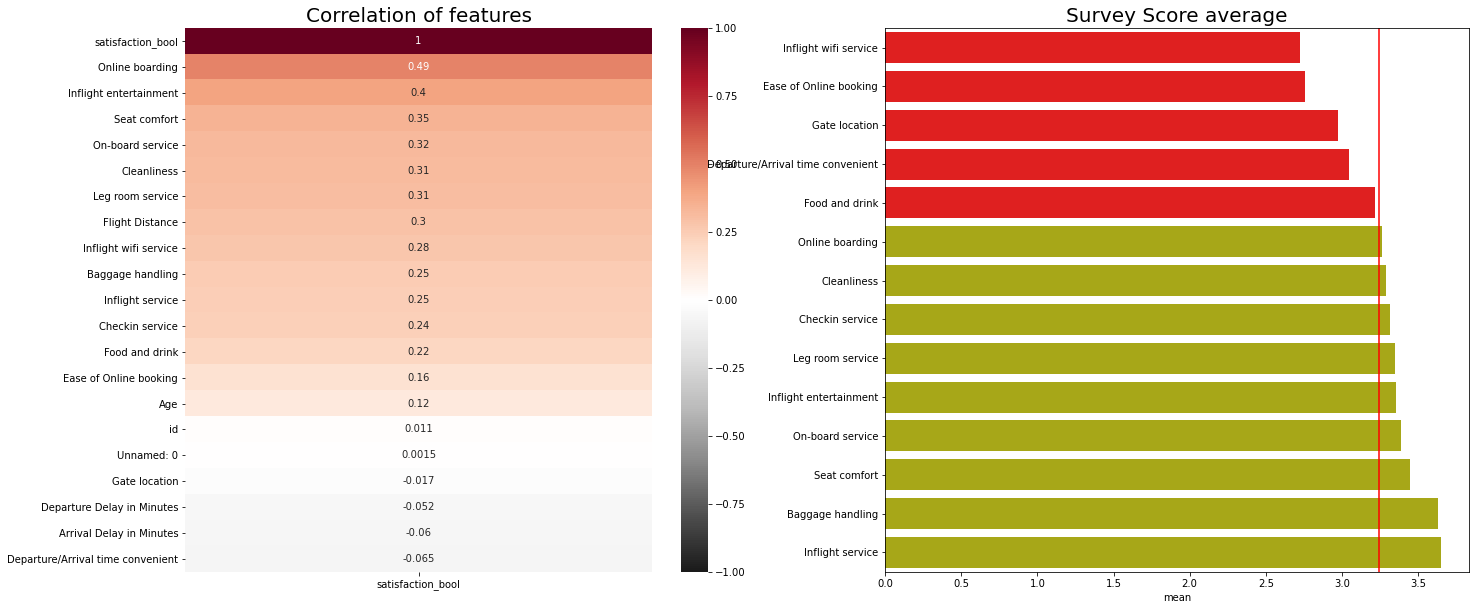

In [16]:
fig, axis=plt.subplots(1,2,figsize=(23,10))

axis[0].set_title("Correlation of features", size=20)
b1 = sns.heatmap(df.corr()[['satisfaction_bool']].sort_values(by='satisfaction_bool', ascending=False), annot=True, vmin=-1, vmax=1,cmap = 'RdGy_r', ax=axis[0])

axis[1].set_title("Survey Score average", size=20)
colors = ["r" if i < summary_kpis["mean"].mean() else "y" for i in summary_kpis["mean"]]
b2= sns.barplot(y = summary_kpis.index, x=summary_kpis["mean"], palette=colors,ax=axis[1])
axis[1].axvline(summary_kpis["mean"].mean(),color = "red")

If we analyze the correlation between features (left graph) and the average survey score (right graph), we suggest to pay attention in:
* Inflight WIFI service: since is the one with less score in surveys, and is also correlated in +0.28 with a positive score.
* Food and Drink: since is also lower than the total average, and has a correlation of 0.22 with satisfaction.
* Online Boarding: this feature is at the median value, but the correlation with the satisfaction is the highest of the subset. We should try to improve it in order to achieve a better score.

Eventhough today have a good performance, due to its high correlation we cannot forget:
* Inflight Entertainment
* Seat Comfort

-----------------------------------------------------

### b) What type of customers do we have to focus on to improve their satisfaction?

In [17]:
# we create a new feature in order tu craft an unique score for each customer. It could also be a weighted KPI based on some assumption, but in this exercise we will make it simplier.

df['satisfaction_avg'] = (df['Inflight wifi service'] + df['Departure/Arrival time convenient'] + df['Ease of Online booking'] +
                        df['Gate location'] + df['Food and drink'] + df['Online boarding'] + df['Seat comfort'] + df['Inflight entertainment'] + 
                        df['On-board service'] + df['Leg room service'] + df['Baggage handling'] + df['Checkin service'] +df['Inflight service'] + df['Cleanliness']) /14

# make the total delay relative to flight distance
df['total_delay over distance'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) / df['Flight Distance']

# make bins of age
df['age_range'] = df.Age.apply(lambda x: '<20' if x<20 else ('20-30' if x <30 else ('30-40' if x <40 else ('40-50' if x<50 else '>=50'))))

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Fut

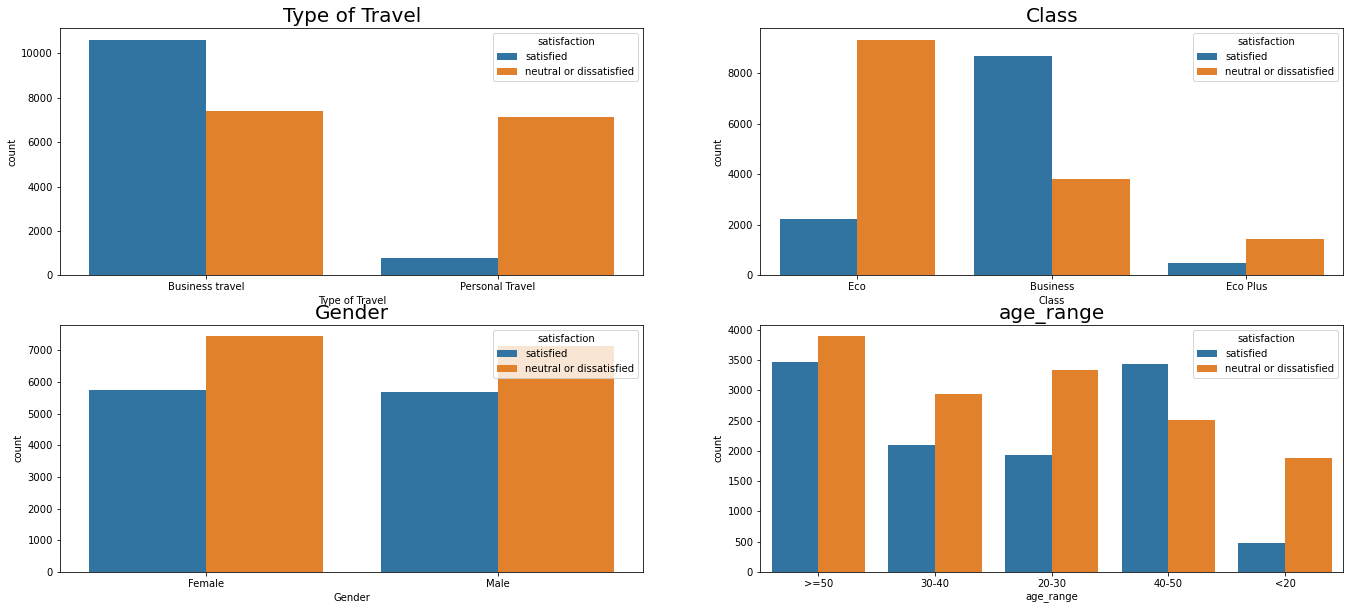

In [32]:
fig, axis=plt.subplots(2,2,figsize=(23,10))

axis[0,0].set_title("Type of Travel", size=20)
b1 = sns.countplot(df['Type of Travel'], hue=df['satisfaction'], ax = axis[0,0])

axis[0,1].set_title("Class", size=20)
b1 = sns.countplot(df['Class'], hue=df['satisfaction'], ax = axis[0,1])

axis[1,0].set_title("Gender", size=20)
b1 = sns.countplot(df['Gender'], hue=df['satisfaction'], ax = axis[1,0])

axis[1,1].set_title("age_range", size=20)
b1 = sns.countplot(df['age_range'], hue=df['satisfaction'], ax = axis[1,1]);

Analyzing the graph above, we can see that:
* We need to pay attention to people who travel in economy class, due to survey results and also due to quantity of passengers.
* Most of the people who traveled for personal reasons did not have a good experience
* In absolute terms, the group of older people was the one that showed the greatest negative values in the surveys. However, in relative terms, the group under 30 mostly had a bad experience, probably due to services related to digital (online booking, internet, etc.)
------------------------------------------

## 4) Extra Analysis

### ⚡ What is the average satisfaction of the areas and in which are we most below?

Text(0.5, 1.0, 'Average satisfaction per category')

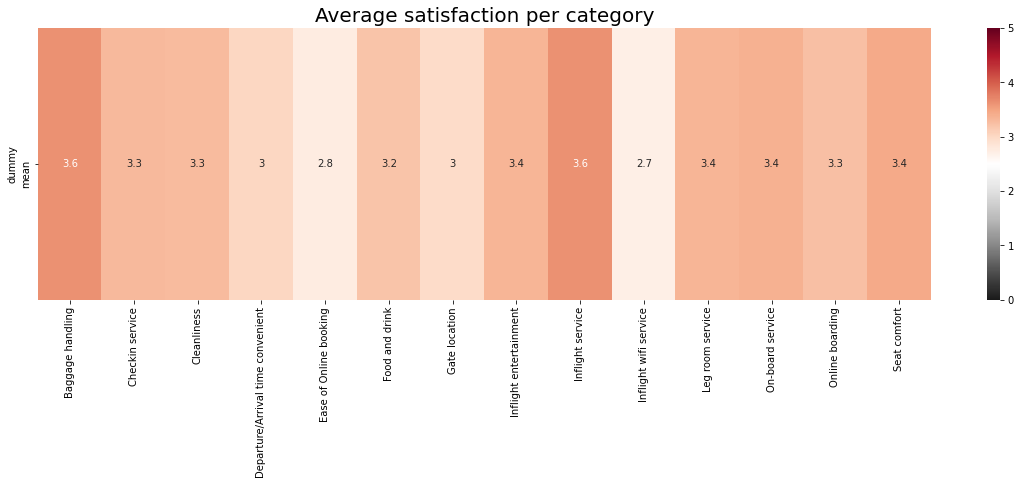

In [32]:
aux = df.copy()
aux['dummy']='mean'
pivot = pd.pivot_table(data = aux,index='dummy',values= col, aggfunc=np.mean )
plt.figure(figsize=(20,5))
sns.heatmap(pivot, annot=True, vmin=0, vmax=5, cmap = 'RdGy_r')
plt.title('Average satisfaction per category', size=20)

Text(0.5, 1.0, 'Average satisfaction per category and Satisfaction group')

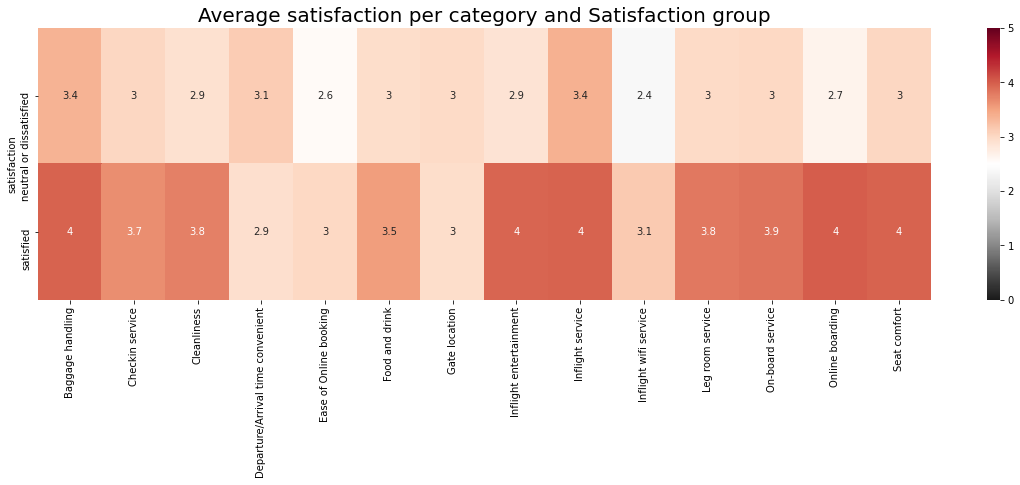

In [33]:

pivot2 = pd.pivot_table(data = df,index='satisfaction',values= col, aggfunc=np.mean )
plt.figure(figsize=(20,5))
sns.heatmap(pivot2, annot=True, vmin=0, vmax=5, cmap = 'RdGy_r')
plt.title('Average satisfaction per category and Satisfaction group', size=20)

As we can see in both graphs, the areas in which we have less satisfaction are:
* "Inflight WIFI service"
* "Ease of online booking"

## 5) Conclussions

When analyzing the general performance of the airline, we can see that in general terms it has a considerable proportion of loyal customers, and is efficient in its flight schedules (+76% with a delay of less than 30 minutes).

So... why we have more than 55% of customers who are neutral or dissatisfied with our service? 

By analyzing our consumers demographically, as well as their survey responses, we see that the greatest dissatisfaction is in economy class, and personal travel.



If we analyze the correlation between features, we suggest to pay attention in:
* Inflight WIFI service: since is the one with less score in surveys, and is also correlated in +0.28 with a positive score.
* Food and Drink: since is also lower than the total average, and has a correlation of 0.22 with satisfaction.
* Online Boarding: this feature is at the median value, but the correlation with the satisfaction is the highest of the subset. We should try to improve it in order to achieve a better score.



Eventhough today have a good performance, due to its high correlation we cannot forget:
* Inflight Entertainment
* Seat Comfort


So...Our business seems to do very well in the business travel category, but considering that not all of our passengers can afford business class, we should consider improving our service in economy class, so as not to lose our loyal customers.

We should also consider to Increase investment in digital modernization of facilities, since they were the worst performers in the surveys, and they can help reverse the experience in leisure trips and young people.